In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = np.genfromtxt("friction_tensor.dat", comments="#", dtype=float)

time = raw[:,0].astype(float)

n_solutes = 4
components = ['X', 'Y', 'Z']
colors = ['r', 'g', 'b']

### Plot of the 12 diagonal elements of the full friction tensor

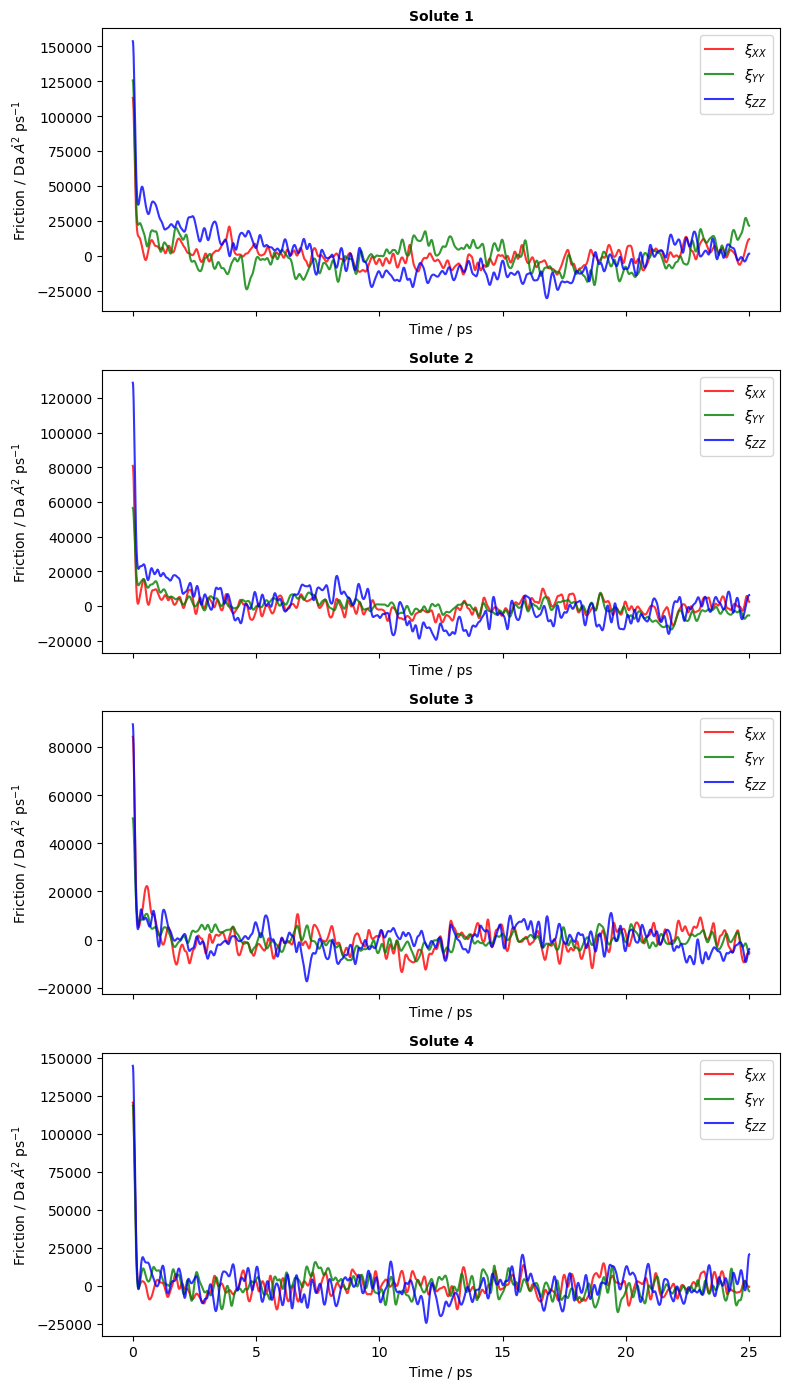

In [3]:
fig, axes = plt.subplots(n_solutes, 1, figsize=(8, 14), sharex=True)

if n_solutes == 1:
    axes = [axes]

for i in range(n_solutes):
    ax = axes[i]
    
    for j, comp in enumerate(components):
        col_idx = 1 + (i * 3) + j
        
        data_col = raw[:, col_idx]
        
        ax.plot(time, data_col, label = rf'$\xi_{{{comp*2}}}$', color=colors[j], linewidth=1.5, alpha=0.8)

    ax.set_ylabel(r"Friction / Da ${\mathring{A}}^2$ ps$^{-1}$", fontsize=10)
    ax.set_xlabel("Time / ps", fontsize=10)
    ax.legend(loc='upper right')
    ax.set_title(f'Solute {i+1}', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

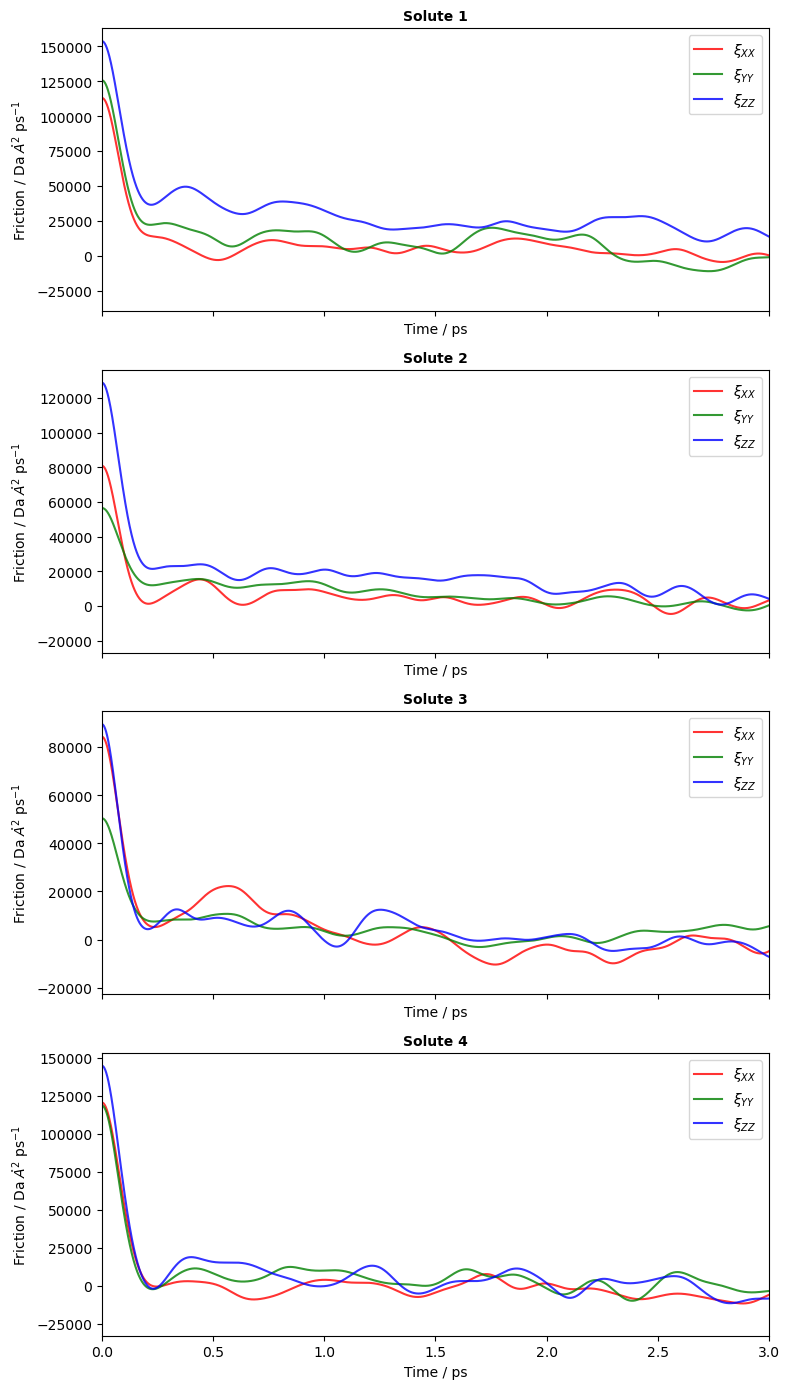

In [4]:
fig, axes = plt.subplots(n_solutes, 1, figsize=(8, 14), sharex=True)

if n_solutes == 1:
    axes = [axes]

for i in range(n_solutes):
    ax = axes[i]
    
    for j, comp in enumerate(components):
        col_idx = 1 + (i * 3) + j
        
        if col_idx < raw.shape[1]:
            data_col = raw[:, col_idx]
            ax.plot(time, data_col, label = rf'$\xi_{{{comp*2}}}$', color=colors[j], linewidth=1.5, alpha=0.8)

    ax.set_ylabel(r"Friction / Da ${\mathring{A}}^2$ ps$^{-1}$", fontsize=10)
    ax.set_xlabel("Time / ps", fontsize=10)
    ax.legend(loc='upper right')
    ax.set_title(f'Solute {i+1}', fontsize=10, fontweight='bold')
    
    ax.set_xlim(0, 3)

plt.tight_layout()
plt.show()

### Plot of the ZZ component of the first solute

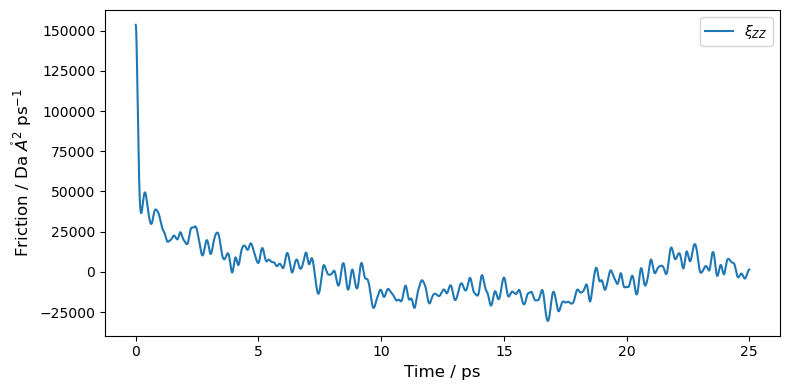

In [5]:
friction_zz = raw[:,3].astype(float)

plt.figure(figsize=(8,4))
plt.plot(time, friction_zz, label=r"$\xi_{ZZ}$")
plt.xlabel("Time / ps", fontsize=12)
plt.ylabel(r"Friction / Da ${\mathring{A}}^2$ ps$^{-1}$", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

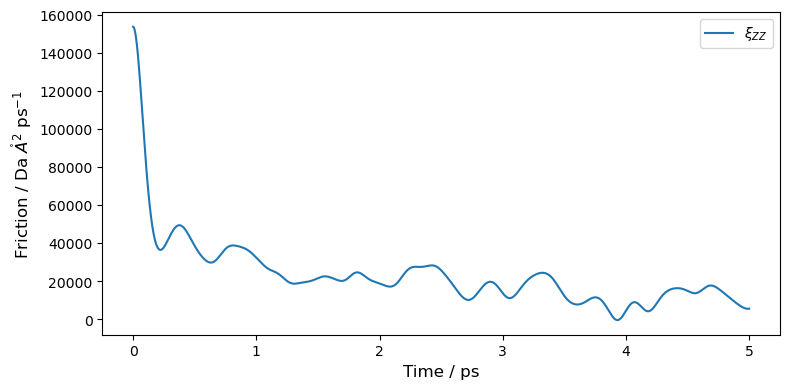

In [6]:
time_zoom = time[0:5000]
friction_zz_zoom = friction_zz[0:5000]

plt.figure(figsize=(8,4))
plt.plot(time_zoom, friction_zz_zoom, label=r"$\xi_{ZZ}$")
plt.xlabel("Time / ps", fontsize=12)
plt.ylabel(r"Friction / Da ${\mathring{A}}^2$ ps$^{-1}$", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

### Plot stats during Equilibration

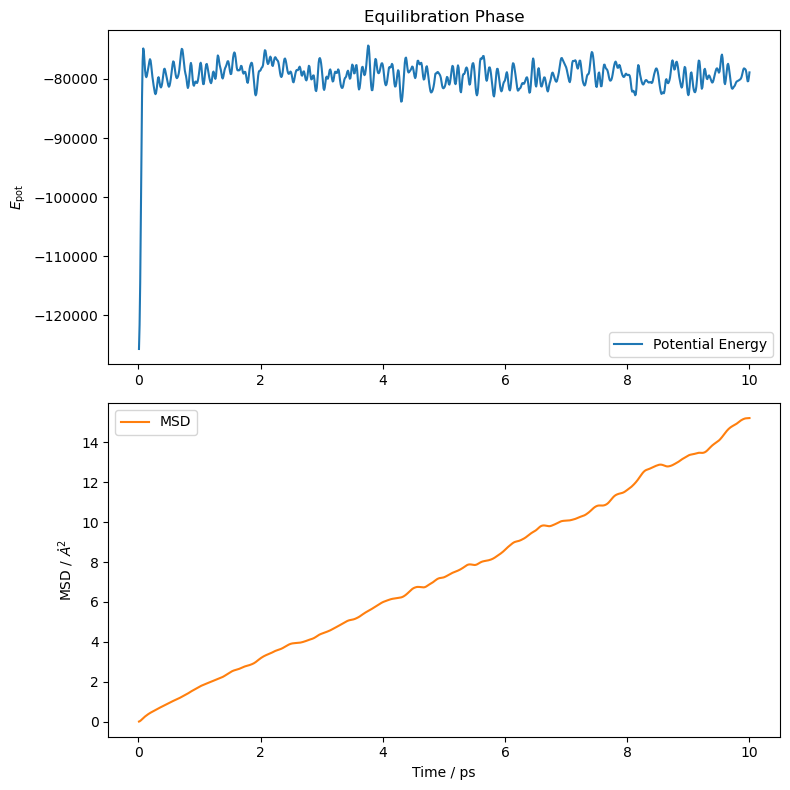

In [7]:
data = np.genfromtxt("equilibration_stats.dat", comments="#")
time = data[:, 0]
epot = data[:, 1]
msd = data[:, 2]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=False)

# Potential Energy
ax1.plot(time, epot, label="Potential Energy", color='tab:blue')
ax1.set_ylabel(r"$E_\text{pot}$")
ax1.set_title("Equilibration Phase")
ax1.legend()

# MSD
ax2.plot(time, msd, label="MSD", color='tab:orange')
ax2.set_ylabel("MSD / ${\mathring{A}}^2$")
ax2.set_xlabel("Time / ps")
ax2.legend()

plt.tight_layout()
plt.show()